In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/gdrive/MyDrive/datasets/heart_failure_corrupted.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187,0,NaN,0,0,2,1
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,NaN,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264.0,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193.0,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131.0,0,1,115,1,1.2,1,1,3,0


# Data Visualization and Exploration

Data visualization makes it easier for us to understand the data and recognize errors within the data

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

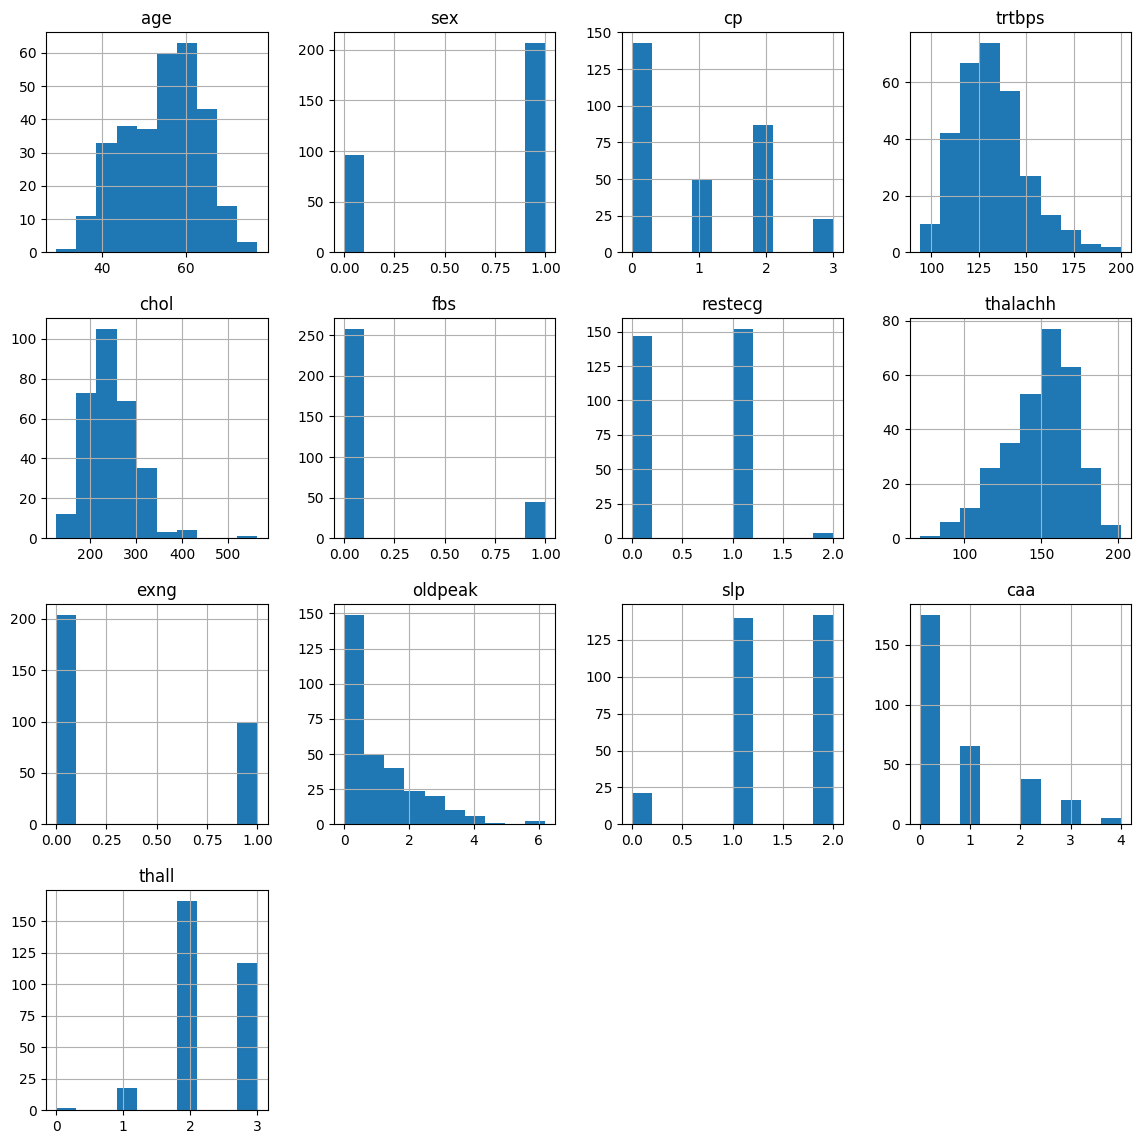

In [ ]:
selected = df.iloc[:,:-1]
selected.hist(figsize=(14,14))

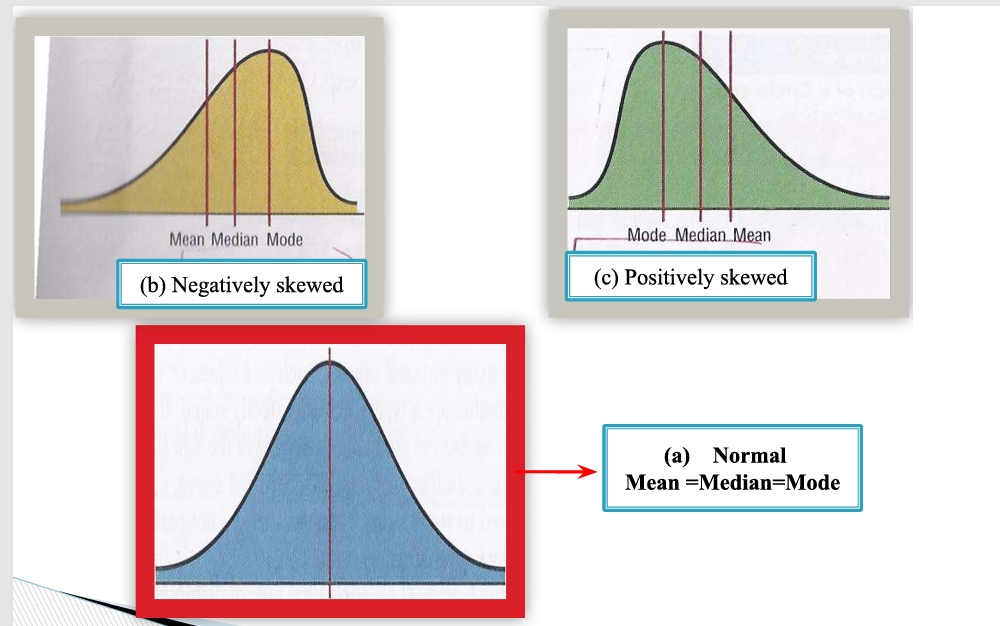

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

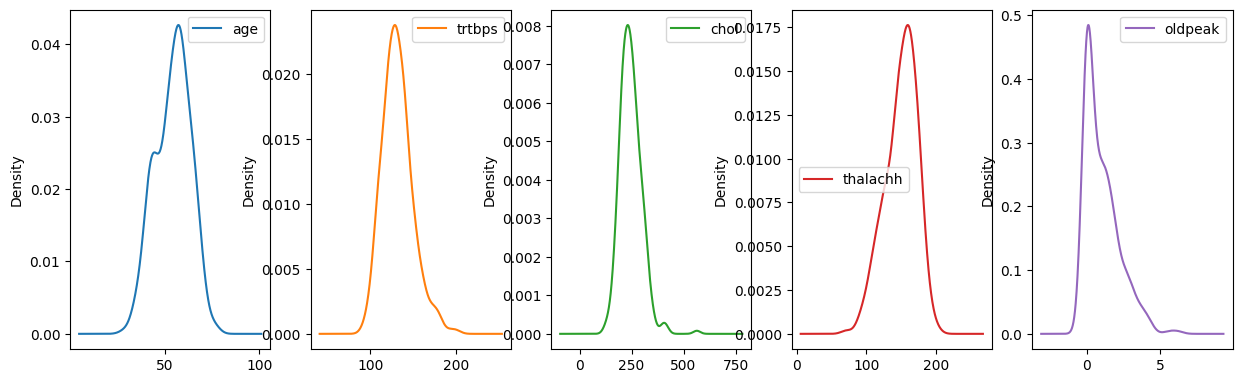

In [ ]:
selected = df.loc[:,['age','trtbps','chol','thalachh','oldpeak']]
selected.plot(kind='density', subplots=True, layout=(3,5), sharex=False,figsize=(15,15))

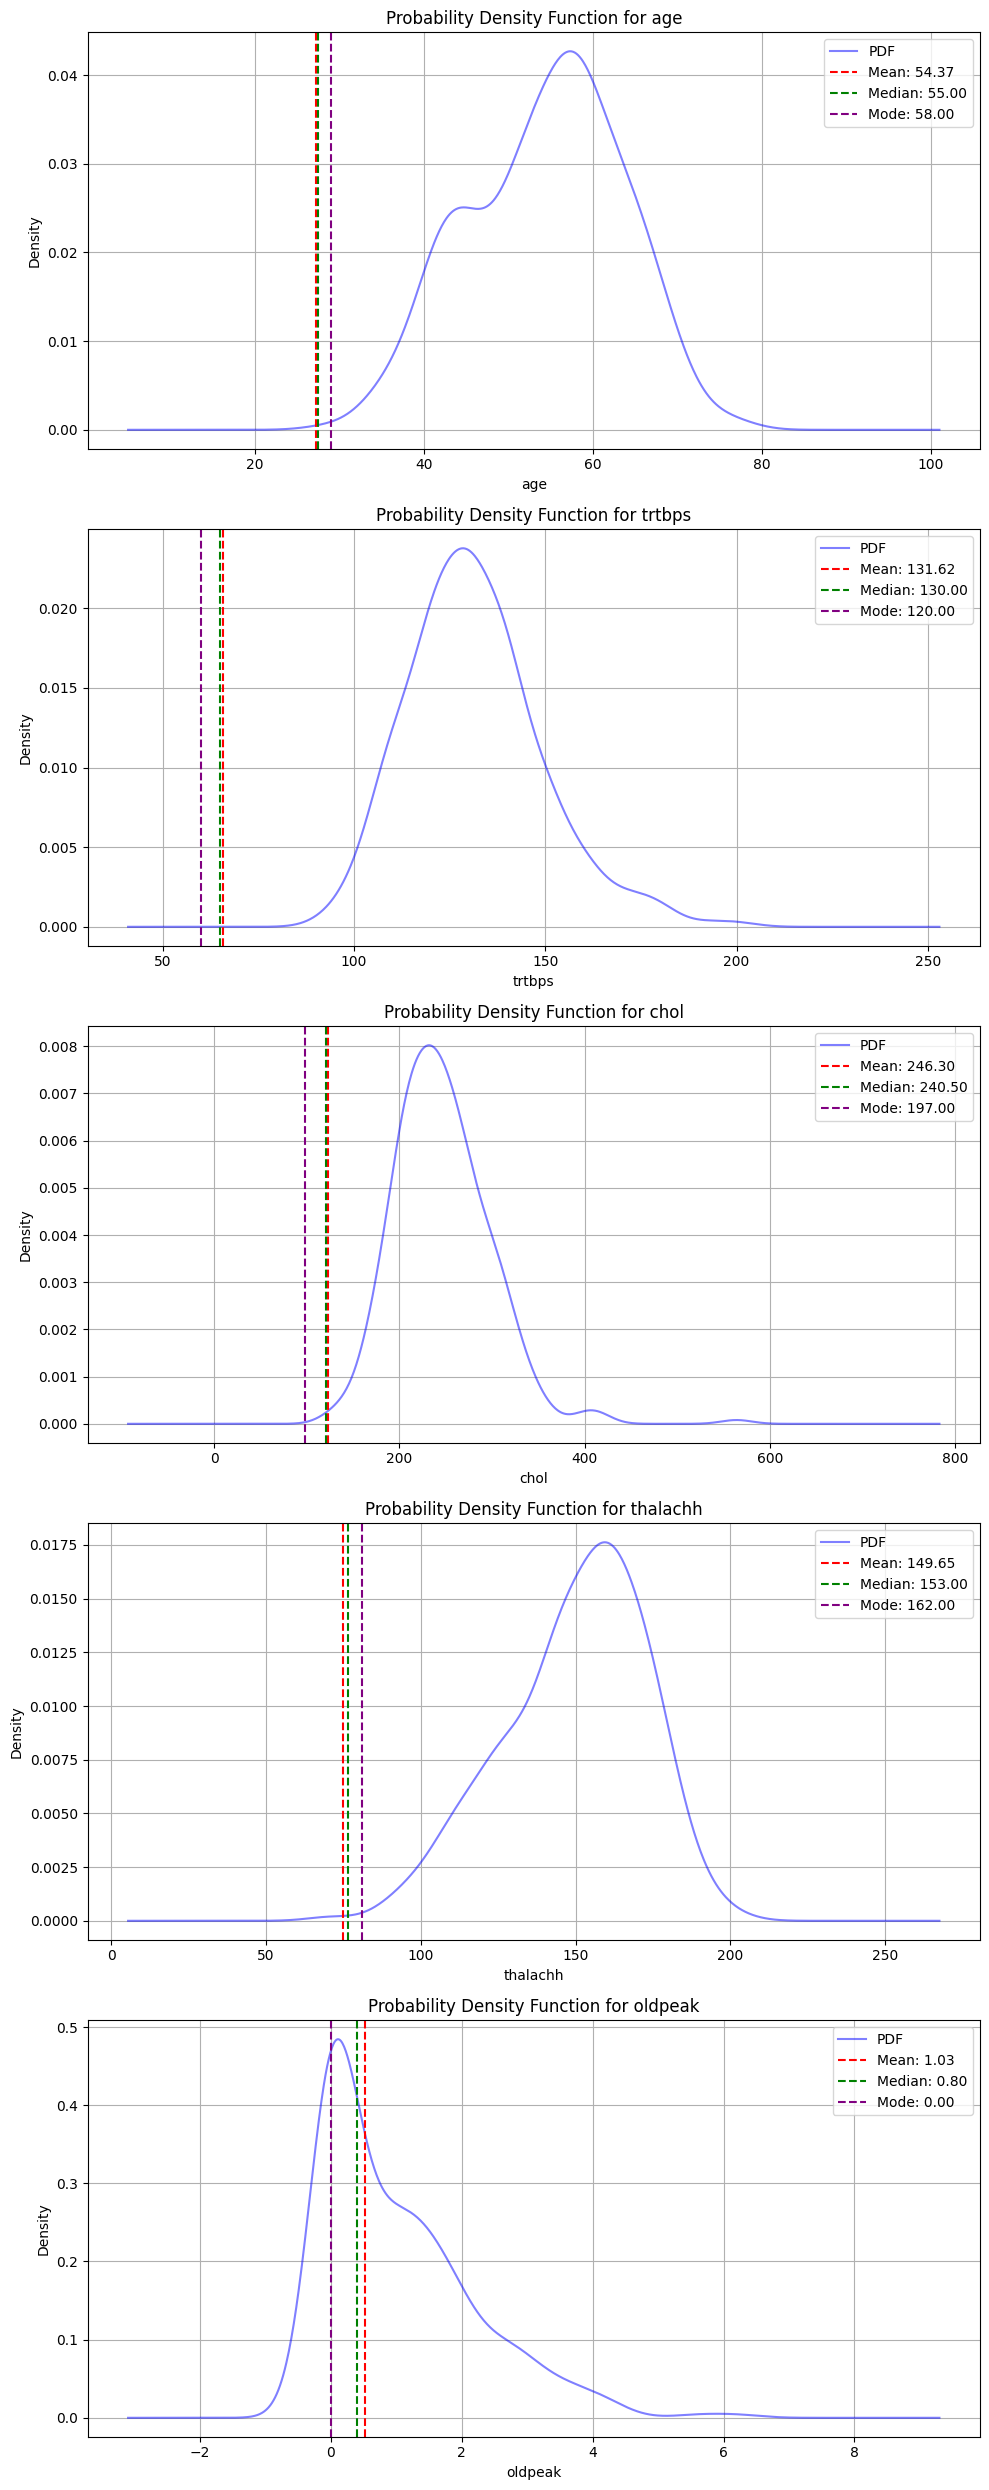

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Setting up the plot
num_features = 5
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

# Loop through each feature to create a PDF plot
for i, column in enumerate(selected):
    # Plotting the density
    df[column].plot(kind='density', ax=axes[i], color='blue', alpha=0.5, label='PDF')

    # Calculate mean, median, and mode
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]

    # Marking mean, median, and mode with horizontal lines
    axes[i].axvline(x=mean / 2, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Adjusted y-value for visibility
    axes[i].axvline(x=median / 2, color='green', linestyle='--', label=f'Median: {median:.2f}')  # Adjusted y-value for visibility
    axes[i].axvline(x=mode / 2, color='purple', linestyle='--', label=f'Mode: {mode:.2f}')  # Adjusted y-value for visibility

    # Adding titles and labels
    axes[i].set_title(f'Probability Density Function for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
df.skew()

,0
age,-0.202463
sex,-0.791335
cp,0.484732
trtbps,0.713768
chol,1.139803
fbs,1.986652
restecg,0.162522
thalachh,-0.537410
exng,0.742532
oldpeak,1.285476


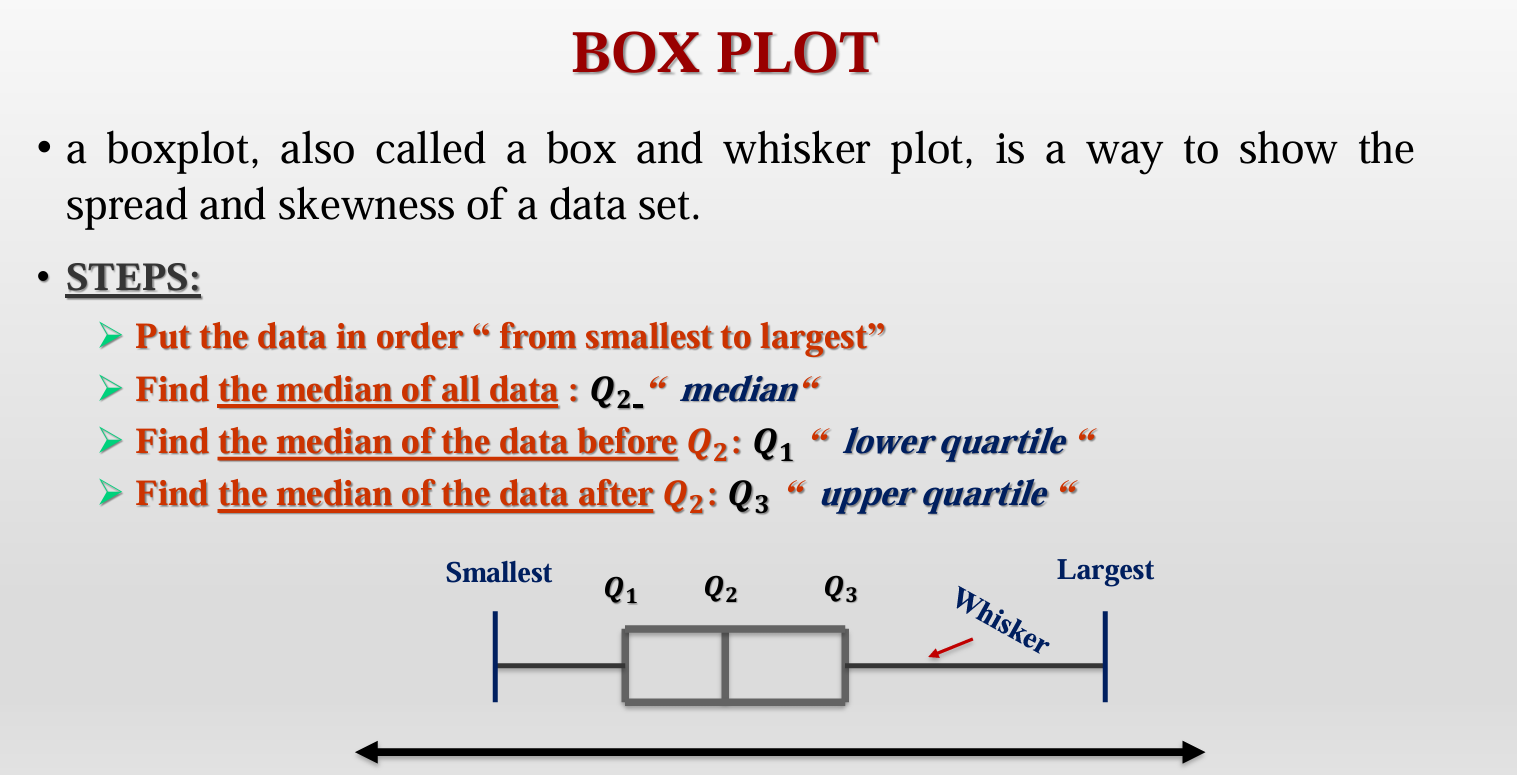

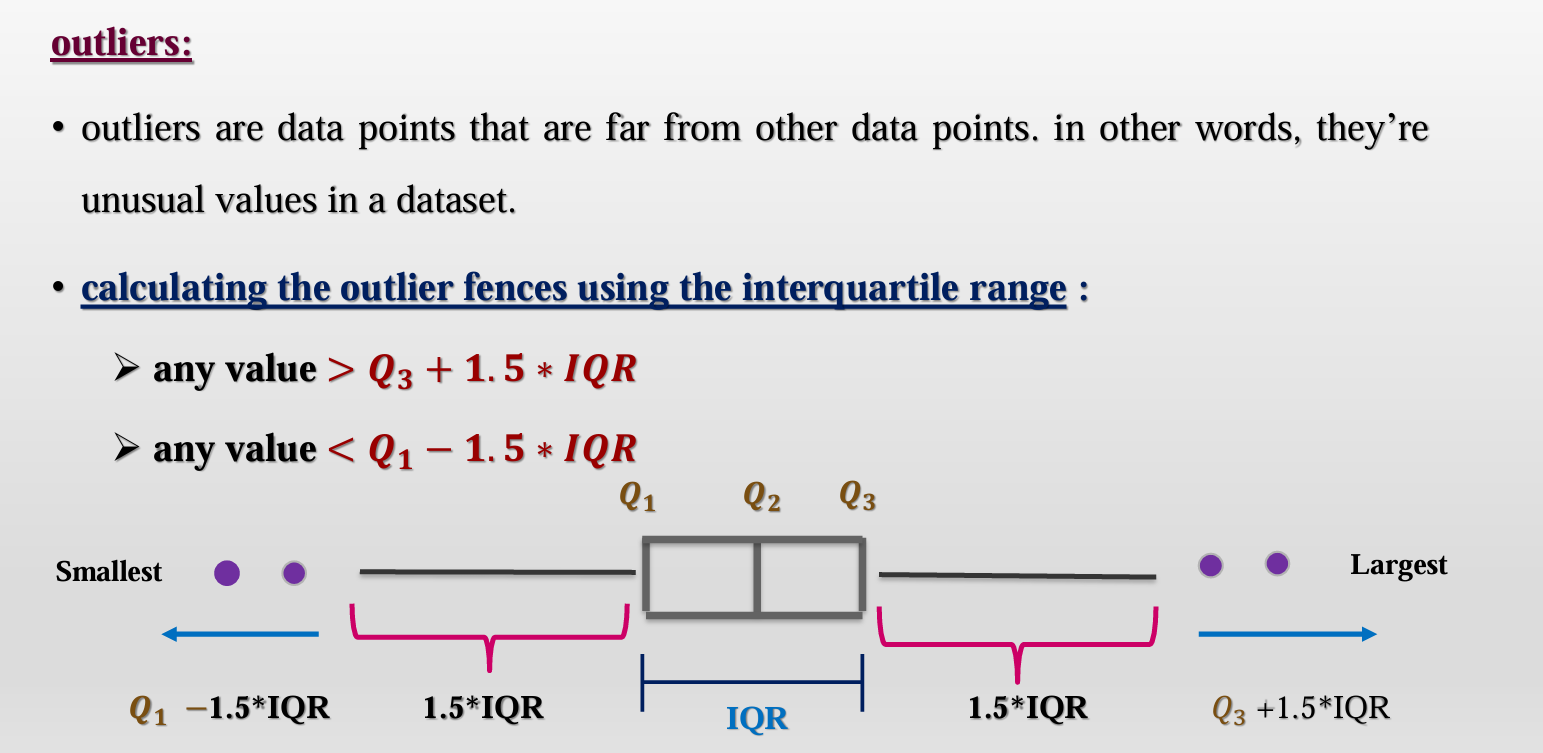

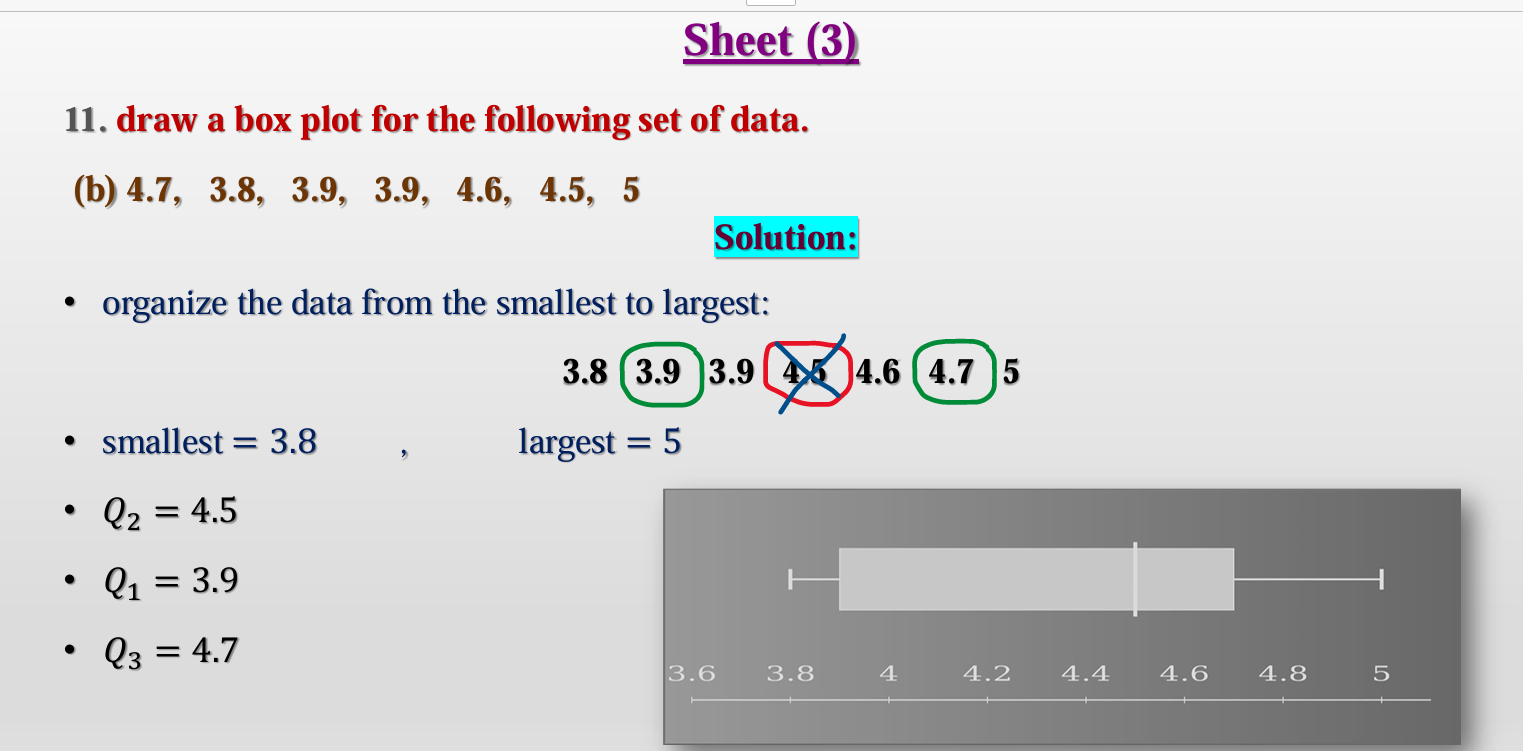

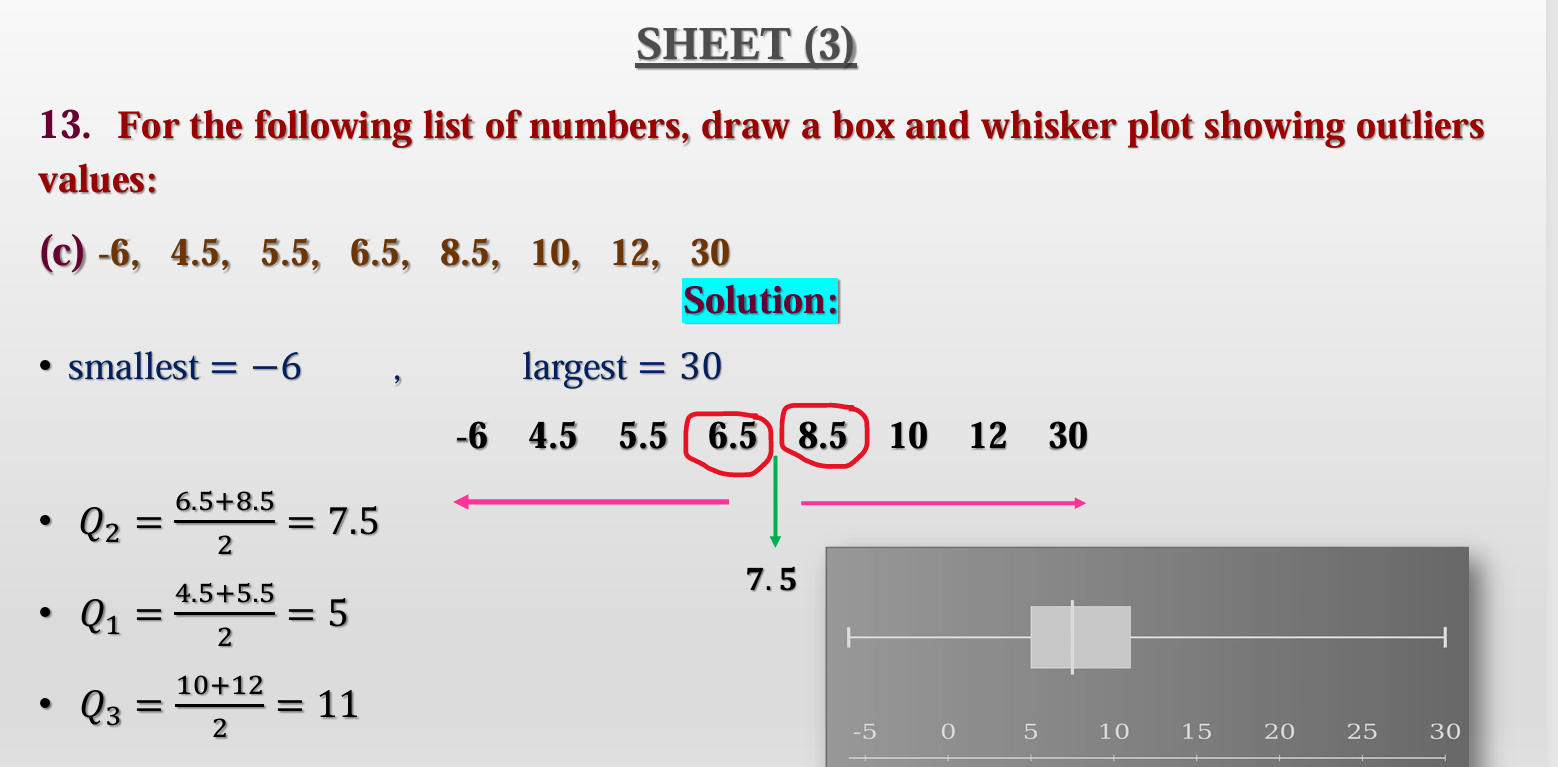

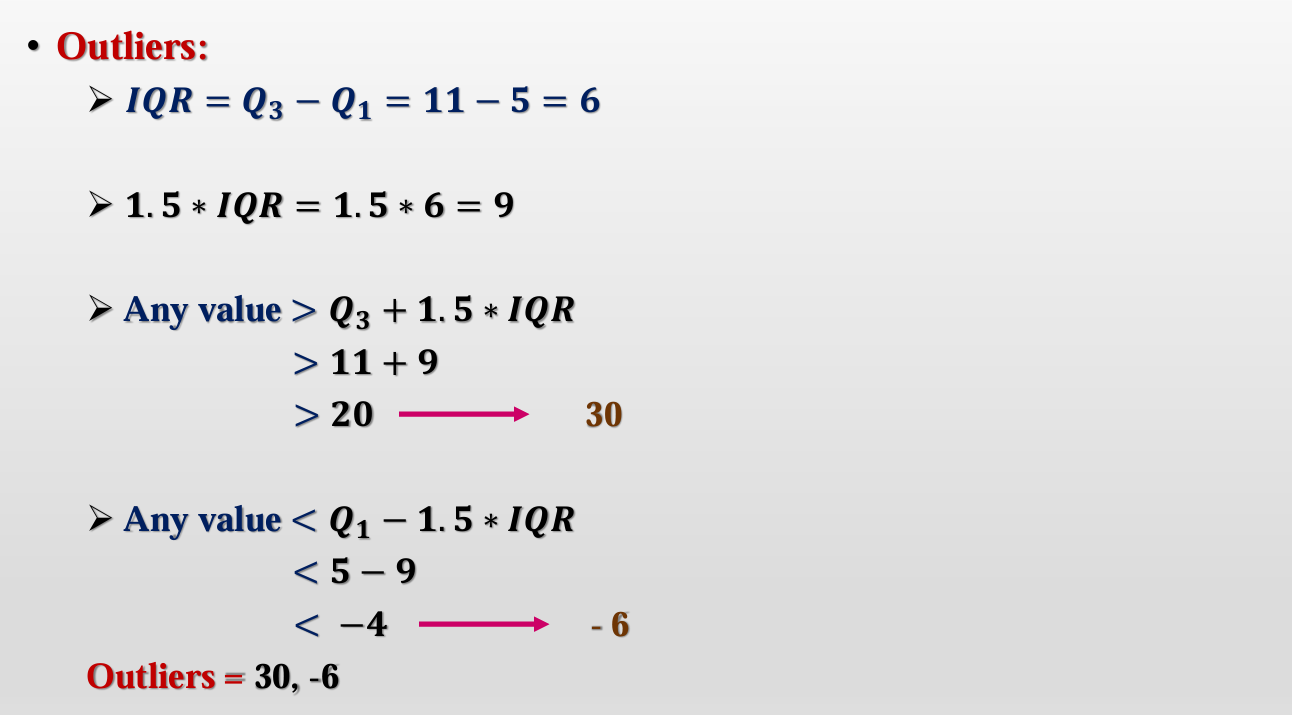

,0
age,"Axes(0.125,0.747241;0.227941x0.132759)"
trtbps,"Axes(0.398529,0.747241;0.227941x0.132759)"
chol,"Axes(0.672059,0.747241;0.227941x0.132759)"
thalachh,"Axes(0.125,0.587931;0.227941x0.132759)"
oldpeak,"Axes(0.398529,0.587931;0.227941x0.132759)"


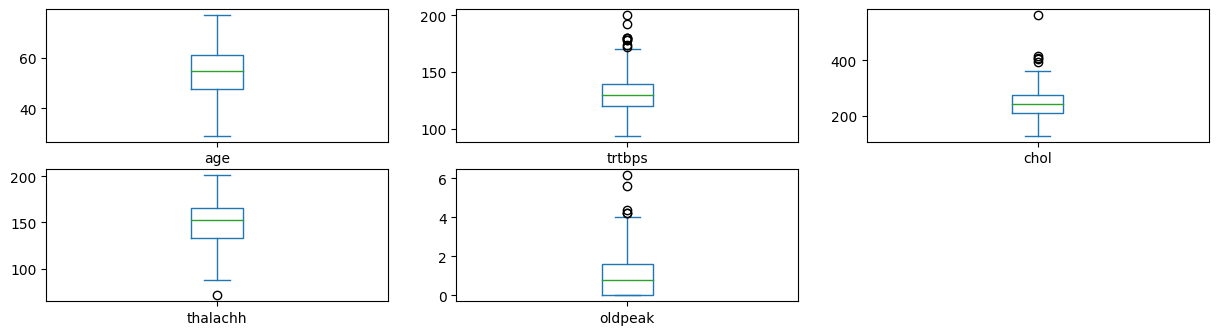

In [ ]:
selected.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(5,3), figsize=(15,10)) #very important to detect outliers that can cause data skew that need to be removed

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,302.000000,303.000000,303.000000,303.000000,303.000000,302.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.298013,0.148515,0.528053,149.646865,0.326733,1.031457,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.913395,0.356198,0.525860,22.905161,0.469794,1.154295,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# checking for NaN values

NaN values cause problems with analysis as well as the performance of the model. They can produce incorrect values or errors in the code
there are multiple ways to deal with NaN values

In [ ]:
df.isnull().sum() #check for any null values

,0
age,0
sex,0
cp,0
trtbps,0
chol,1
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,1


# Data Cleaning

## Handling missing data

### **replacing NaN values with a value (Mean, median or mode value of the feature)**

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') #change the strategy for changing the method of interpolation
imputer.fit(df)
df.iloc[:,:] = imputer.transform(df)

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.000000,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250.000000,0,1,187,0,1.031457,0,0,2,1
2,41,0,1,130,204.000000,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,246.298013,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354.000000,0,1,163,1,0.600000,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.000000,0,1,123,1,0.200000,1,0,3,0
299,45,1,3,110,264.000000,0,1,132,0,1.200000,1,0,3,0
300,68,1,0,144,193.000000,1,1,141,0,3.400000,1,2,3,0
301,57,1,0,130,131.000000,0,1,115,1,1.200000,1,1,3,0


### **dropping the row with the Nan Value**

In [ ]:
df.drop([1])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.000000,1,0,150,0,2.3,0,0,1,1
2,41,0,1,130,204.000000,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,246.298013,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354.000000,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192.000000,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.000000,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264.000000,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193.000000,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131.000000,0,1,115,1,1.2,1,1,3,0


### **Dropping the features with Nan Values (this is done when Nan Values exceed 60 - 70%)**

In [ ]:
df.drop(columns=["chol","oldpeak"])

,age,sex,cp,trtbps,fbs,restecg,thalachh,exng,slp,caa,thall,output
0,63,1,3,145,1,0,150,0,0,0,1,1
1,37,1,2,130,0,1,187,0,0,0,2,1
2,41,0,1,130,0,0,172,0,2,0,2,1
3,56,1,1,120,0,1,178,0,2,0,2,1
4,57,0,0,120,0,1,163,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,0,1,123,1,1,0,3,0
299,45,1,3,110,0,1,132,0,1,0,3,0
300,68,1,0,144,1,1,141,0,1,2,3,0
301,57,1,0,130,0,1,115,1,1,1,3,0


## **removing the outliers**

In [ ]:
Q1 = np.percentile(df['trtbps'], 25)
Q3 = np.percentile(df['trtbps'], 75)
IQR = Q3 - Q1
df = df[(df['trtbps'] >= Q1 - 1.5 * IQR) & (df['trtbps'] <= Q3 + 1.5 * IQR)] #this will pull the value of the skew closer to 0

In [ ]:
Q1 = np.percentile(df['chol'], 25)
Q3 = np.percentile(df['chol'], 75)
IQR = Q3 - Q1
df = df[(df['chol'] >= Q1 - 1.5 * IQR) & (df['chol'] <= Q3 + 1.5 * IQR)] #this will pull the value of the skew closer to 0

In [ ]:
Q1 = np.percentile(df['age'], 25)
Q3 = np.percentile(df['age'], 75)
IQR = Q3 - Q1
df = df[(df['age'] >= Q1 - 1.5 * IQR) & (df['age'] <= Q3 + 1.5 * IQR)] #this will pull the value of the skew closer to 0

In [ ]:
Q1 = np.percentile(df['oldpeak'], 25)
Q3 = np.percentile(df['oldpeak'], 75)
IQR = Q3 - Q1
df = df[(df['oldpeak'] >= Q1 - 1.5 * IQR) & (df['oldpeak'] <= Q3 + 1.5 * IQR)] #this will pull the value of the skew closer to 0

In [ ]:
Q1 = np.percentile(df['thalachh'], 25)
Q3 = np.percentile(df['thalachh'], 75)
IQR = Q3 - Q1
df = df[(df['thalachh'] >= Q1 - 1.5 * IQR) & (df['thalachh'] <= Q3 + 1.5 * IQR)] #this will pull the value of the skew closer to 0

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.000000,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250.000000,0,1,187,0,1.031457,0,0,2,1
2,41,0,1,130,204.000000,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,246.298013,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354.000000,0,1,163,1,0.600000,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.000000,0,1,123,1,0.200000,1,0,3,0
299,45,1,3,110,264.000000,0,1,132,0,1.200000,1,0,3,0
300,68,1,0,144,193.000000,1,1,141,0,3.400000,1,2,3,0
301,57,1,0,130,131.000000,0,1,115,1,1.200000,1,1,3,0


## Dropping Duplicates

In [ ]:
df = df.drop_duplicates()

# Correlation

2 features in the dataset can be strongly linked together, one feature may depend on another one, this can strongly cause the deterioration of a machine learning model. we need to identify the correlated features and remove one of them

In [ ]:
df2 = pd.read_csv('/gdrive/MyDrive/datasets/geneExpressionData.csv', index_col=0 )
data = df2[['gene_1718', 'gene_2032', 'gene_253', 'gene_3314', 'gene_2352']]

In [ ]:
correlation_matrix = data.corr() #calculating correlation coeffecients between different features
correlation_matrix


,gene_1718,gene_2032,gene_253,gene_3314,gene_2352
gene_1718,1.000000,0.092477,-0.313467,-0.307624,-0.807750
gene_2032,0.092477,1.000000,-0.006192,-0.008910,-0.141020
gene_253,-0.313467,-0.006192,1.000000,0.816685,0.434001
gene_3314,-0.307624,-0.008910,0.816685,1.000000,0.400072
gene_2352,-0.807750,-0.141020,0.434001,0.400072,1.000000


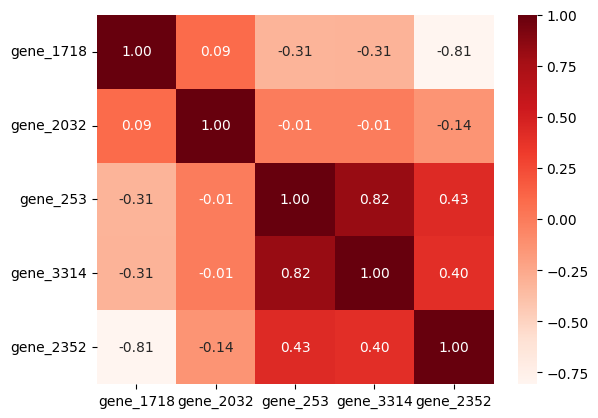

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, cmap='Reds', annot=True, fmt='.2f')

plt.show()

<Axes: xlabel='gene_253', ylabel='gene_3314'>

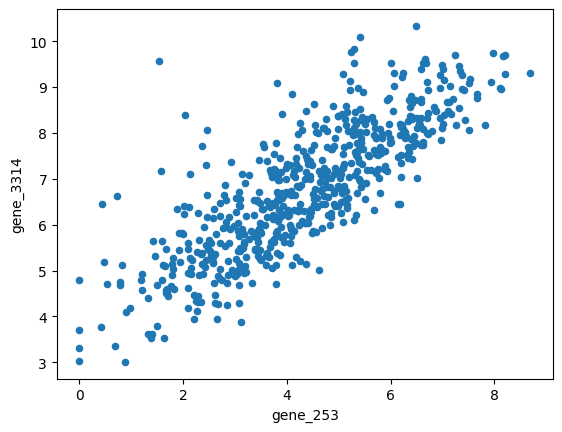

In [ ]:
df2.plot(kind='scatter', x='gene_253',y='gene_3314')

# Feature Scaling

Feature scaling is used to stop features dominating each other that other feature are not even considered.
Feature scaling is applied to dataset for columns, not rows. There are 2 techniques for feature scaling.

## **Normalization**


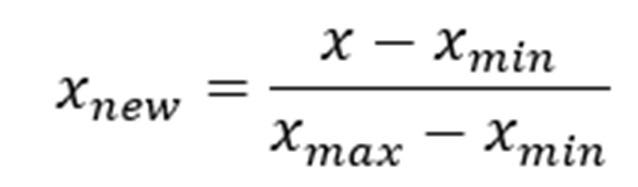

Values will range between [0;1]



In [ ]:
from sklearn.preprocessing import MinMaxScaler
features = ['age','trtbps','chol','thalachh','oldpeak']
sc = MinMaxScaler()
df[features] = sc.fit_transform(df[features])

In [ ]:
df.describe() #notice the min and max in  columns

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,0.521864,0.699647,0.985866,0.472150,0.497226,0.141343,0.522968,0.543519,0.318021,0.235805,1.427562,0.696113,2.296820,0.558304
std,0.190171,0.459224,1.031324,0.202471,0.190826,0.348992,0.514336,0.199049,0.466533,0.253774,0.599246,0.985472,0.610392,0.497469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.000000,0.000000,0.342105,0.361111,0.000000,0.000000,0.399123,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,0.541667,1.000000,1.000000,0.473684,0.487179,0.000000,1.000000,0.570175,0.000000,0.150000,1.000000,0.000000,2.000000,1.000000
75%,0.645833,1.000000,2.000000,0.605263,0.617521,0.000000,1.000000,0.701754,1.000000,0.400000,2.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,1.000000


## **Standardization**

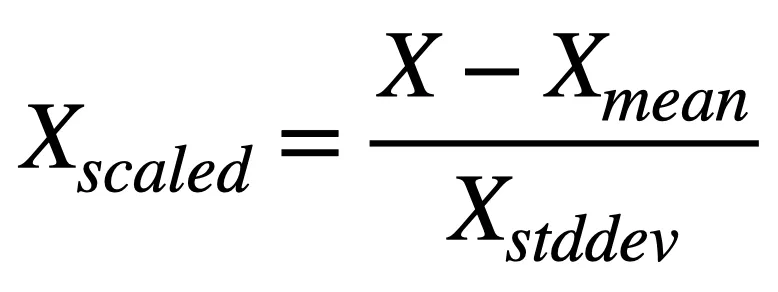

the feature will have a mean of 0 and a standard deviation of 1, values can be higher or lower than that

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['age','trtbps','chol','thalachh','oldpeak']
sc = StandardScaler()
df[features] = sc.fit_transform(df[features])

<ipython-input-71-e4aff86ea14b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = sc.fit_transform(df[features])


In [ ]:
df.describe() #notice the mean and std in columns

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,2.830000e+02,283.000000,283.000000,2.830000e+02,2.830000e+02,283.000000,283.000000,2.830000e+02,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,-2.510752e-17,0.699647,0.985866,5.523654e-16,2.824596e-16,0.141343,0.522968,-3.012902e-16,0.318021,0.000000,1.427562,0.696113,2.296820,0.558304
std,1.001771e+00,0.459224,1.031324,1.001771e+00,1.001771e+00,0.348992,0.514336,1.001771e+00,0.466533,1.001771,0.599246,0.985472,0.610392,0.497469
min,-2.749050e+00,0.000000,0.000000,-2.336070e+00,-2.610271e+00,0.000000,0.000000,-2.735410e+00,0.000000,-0.930839,0.000000,0.000000,0.000000,0.000000
25%,-7.736431e-01,0.000000,0.000000,-6.434256e-01,-7.145576e-01,0.000000,0.000000,-7.267127e-01,0.000000,-0.930839,1.000000,0.000000,2.000000,0.000000
50%,1.043158e-01,1.000000,1.000000,7.591363e-03,-5.274067e-02,0.000000,1.000000,1.341575e-01,0.000000,-0.338715,1.000000,0.000000,2.000000,1.000000
75%,6.530401e-01,1.000000,2.000000,6.586083e-01,6.315108e-01,0.000000,1.000000,7.963654e-01,1.000000,0.648158,2.000000,1.000000,3.000000,1.000000
max,2.518703e+00,1.000000,3.000000,2.611659e+00,2.639396e+00,1.000000,2.000000,2.297370e+00,1.000000,3.016654,2.000000,4.000000,3.000000,1.000000


## **but why do we use standardization and normalization in the first place ?  and when to use either ?**

as mentioned before, this is to insure all features have the same scale to avoid feature domination.
feature scaling is important for gradient calculation (more on that later)
it is better to use normalization  when we don't know about the data distribution, if we know that our data is distributed as gaussian distribution use standardization

# Q-Q Plot

Q-Q plot is a plot to help us check if a feature is normally distributed
if the data is normally distributed, the points will lie very close to the straight line

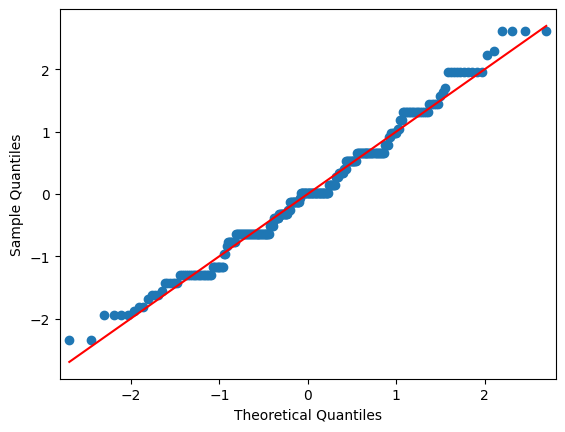

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = sm.qqplot(df['trtbps'], line='s')
plt.show()


In [ ]:
from scipy import stats
stats.kstest(df['trtbps'],'norm')  #kolmogrov-smirnov test for normal distribution

KstestResult(statistic=0.09061108922029837, pvalue=0.017965332985754486, statistic_location=0.007591363433383082, statistic_sign=1)

In [ ]:

stats.shapiro(df['trtbps'])  #shapiro-wilk test for normal distribution

ShapiroResult(statistic=0.9840428577878757, pvalue=0.0030403936716043053)

# References



*   sklearn Documentation : https://scikit-learn.org/stable/
*   Scipy Documentation : https://scipy.org




Thanks to Eng. Mahmoud Mabrouk and Eng. Nourhan Ramadan for providing some of the cells in this notebook